<a href="https://colab.research.google.com/github/RezoanurRahman/Book_Recommender/blob/master/Book_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow.keras as tf



In [ ]:
book_db = pd.read_csv('books.csv')
rating_db = pd.read_csv('ratings.csv')

rating_db.head()
book_db.head()

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest= train_test_split(rating_db, test_size= 0.2, random_state=1)


In [19]:
nbook_id = rating_db.book_id.nunique()
nuser_id = rating_db.user_id.nunique()


In [ ]:
input_books= tf.layers.Input(shape= 1)
input_embedbooks = tf.layers.Embedding(nbook_id+1, 15)(input_books)
output_books = tf.layers.Flatten()(input_embedbooks)
output_books.shape

In [ ]:
input_users= tf.layers.Input(shape= 1)
input_embedusers = tf.layers.Embedding(nuser_id+1, 15)(input_users)
output_users = tf.layers.Flatten()(input_embedusers)
output_users.shape

In [25]:
mainembeddlayer = tf.layers.Concatenate()([output_users, output_books])
seconddenselayer= tf.layers.Dense(128,activation= 'relu')(mainembeddlayer)
finaldenselayer = tf.layers.Dense(1,activation='relu')(seconddenselayer)

model = tf.Model([input_users, input_books], finaldenselayer)

opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
model.summary()


fitedmodel = model.fit([Xtrain.user_id,Xtrain.book_id], Xtrain.rating, 
                 batch_size=64, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.user_id, Xtest.book_id], Xtest.rating))

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 15)        801375      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 15)        150015      input_4[0][0]                    
_______________________________________________________________________________________

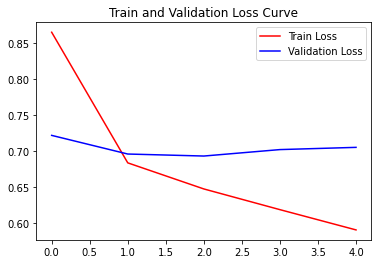

In [26]:
train_loss = fitedmodel.history['loss']
val_loss = fitedmodel.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [27]:
#save the model
model.save('model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets
